#### Install some necessary libraries

In [1]:
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/qn/zzlz3xfn3sg_7htk7xqrfzfw0000gn/T//RtmpteWwYv/downloaded_packages


In [2]:
install.packages("e1071")   # or
install.packages("moments") # or
install.packages("psych")


The downloaded binary packages are in
	/var/folders/qn/zzlz3xfn3sg_7htk7xqrfzfw0000gn/T//RtmpteWwYv/downloaded_packages

The downloaded binary packages are in
	/var/folders/qn/zzlz3xfn3sg_7htk7xqrfzfw0000gn/T//RtmpteWwYv/downloaded_packages

The downloaded binary packages are in
	/var/folders/qn/zzlz3xfn3sg_7htk7xqrfzfw0000gn/T//RtmpteWwYv/downloaded_packages


In [11]:
library("dplyr")
library("magrittr")
library(stringr)

In [4]:
getwd()

[1] "/Users/mymac/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/MXB107/Code"

#### Begin wrangling the data

Data wrangling is the process of cleaning, transforming, and reshaping data for analysis. The `dplyr` package, often used with the pipe operator `%>%` from `magrittr`, provides a set of intuitive functions for these tasks.

In [5]:
MXB107_Info = read.csv('./datasets/MXB107_2025.csv')
str(MXB107_Info)

'data.frame':	12 obs. of  8 variables:
 $ Class         : chr  "LEC01 01" "LEC01 01" "PRC01 01" "PRC01 01" ...
 $ Type          : chr  "Lecture (Internal)" "Lecture (Online)" "Practical (Online)" "Practical (Internal)" ...
 $ Day           : chr  "Wed" "Wed" "Wed" "Thu" ...
 $ Location      : chr  "GP B117" "Online" "Online" "GP D413" ...
 $ Limit         : int  240 1000 30 35 30 35 25 30 35 35 ...
 $ Teaching_Staff: chr  "Chris Drovandi" "Chris Drovandi" "Narayan Srinivasan" "Narayan Srinivasan" ...
 $ From          : int  11 11 16 16 16 9 14 9 9 11 ...
 $ To            : int  13 13 18 18 18 11 16 11 11 13 ...


Ex: extract all classes from the dataset that is either on Thursday or Friday and start after 9 and are not online 

In [6]:
print(MXB107_Info)

      Class                 Type Day Location Limit         Teaching_Staff From
1  LEC01 01   Lecture (Internal) Wed  GP B117   240         Chris Drovandi   11
2  LEC01 01     Lecture (Online) Wed   Online  1000         Chris Drovandi   11
3  PRC01 01   Practical (Online) Wed   Online    30     Narayan Srinivasan   16
4  PRC01 01 Practical (Internal) Thu  GP D413    35     Narayan Srinivasan   16
5  PRC01 02   Practical (Online) Thu   Online    30              Oliver Vu   16
6  PRC01 03 Practical (Internal) Thu  GP G216    35       Minh Long Nguyen    9
7  PRC01 07 Practical (Internal) Thu  GP S520    25             Ryan Kelly   14
8  PRC01 08 Practical (Internal) Thu  GP S517    30 Nicholas Gecks-Preston    9
9  PRC01 02 Practical (Internal) Fri  GP G216    35              Oliver Vu    9
10 PRC01 04 Practical (Internal) Fri  GP G216    35         Arwen Nugteren   11
11 PRC01 05 Practical (Internal) Fri  GP S502    35         Arwen Nugteren   15
12 PRC01 06 Practical (Internal) Fri  GP

In [7]:
onLine = MXB107_Info$Location != "Online"
onDay = MXB107_Info$Day %in% c("Thu","Fri")
onTime = MXB107_Info$From > 9
subset(MXB107_Info, onLine & onDay & onTime)

,Class,Type,Day,Location,Limit,Teaching_Staff,From,To
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
4,PRC01 01,Practical (Internal),Thu,GP D413,35,Narayan Srinivasan,16,18
7,PRC01 07,Practical (Internal),Thu,GP S520,25,Ryan Kelly,14,16
10,PRC01 04,Practical (Internal),Fri,GP G216,35,Arwen Nugteren,11,13
11,PRC01 05,Practical (Internal),Fri,GP S502,35,Arwen Nugteren,15,17
12,PRC01 06,Practical (Internal),Fri,GP S519,35,Minh Long Nguyen,15,17


The `dplyr` and `magrittr` packages simplify and streamline data manipulation by providing a data-processing pipeline.

When we write

```
input %>% do_something_1() %>% do_something_2()
```

The pipe operator %>% takes the output from the expression on the left and passes it as the **first argument** to the function on the right. This allows chaining multiple operations in a clear, readable sequence.


In base R, it would be something like

```
output1 = do_something_1(input)
output2 = do_something_2(output1)
```
Which one looks better to you?


Another great feature of `dplyr` is that it natively understands data frame columns by internally converting data frames into **tibbles** — a more user-friendly data frame format.

This means we don’t need to repeatedly write `MXB107_Info$From` or similar; inside `dplyr` **verbs** like `filter()`, we can simply refer to columns by their names, such as `From` and `To`, which makes the code much cleaner and easier to read.

In [8]:
library("dplyr")
MXB107_Info %>%
  filter(Location != "Online",
         Day %in% c("Thu", "Fri"),
         From > 9) -> results
print(results)

     Class                 Type Day Location Limit     Teaching_Staff From To
1 PRC01 01 Practical (Internal) Thu  GP D413    35 Narayan Srinivasan   16 18
2 PRC01 07 Practical (Internal) Thu  GP S520    25         Ryan Kelly   14 16
3 PRC01 04 Practical (Internal) Fri  GP G216    35     Arwen Nugteren   11 13
4 PRC01 05 Practical (Internal) Fri  GP S502    35     Arwen Nugteren   15 17
5 PRC01 06 Practical (Internal) Fri  GP S519    35   Minh Long Nguyen   15 17


### Common dplyr functions:

#### filter(): subset rows by condition

Find class Practical Internal from the dataset

In [9]:
MXB107_Info %>%
filter(Type == "Practical (Internal)")

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Internal),Thu,GP D413,35,Narayan Srinivasan,16,18
PRC01 03,Practical (Internal),Thu,GP G216,35,Minh Long Nguyen,9,11
PRC01 07,Practical (Internal),Thu,GP S520,25,Ryan Kelly,14,16
PRC01 08,Practical (Internal),Thu,GP S517,30,Nicholas Gecks-Preston,9,11
PRC01 02,Practical (Internal),Fri,GP G216,35,Oliver Vu,9,11
PRC01 04,Practical (Internal),Fri,GP G216,35,Arwen Nugteren,11,13
PRC01 05,Practical (Internal),Fri,GP S502,35,Arwen Nugteren,15,17
PRC01 06,Practical (Internal),Fri,GP S519,35,Minh Long Nguyen,15,17


Find the Practical class on Wednesday

In [12]:
MXB107_Info %>%
filter(str_detect(Type,"Practical"), Day == "Wed") #base R: str_detect(MXB107_Info$Type, pattern = "Practical")

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


#### select(): pick a specific column

In [13]:
MXB107_Info %>%
filter(Teaching_Staff == "Chris Drovandi") %>%
select(Class, Teaching_Staff,Location, From, To)

Class,Teaching_Staff,Location,From,To
<chr>,<chr>,<chr>,<int>,<int>
LEC01 01,Chris Drovandi,GP B117,11,13
LEC01 01,Chris Drovandi,Online,11,13


#### mutate(): add or modify a column

In [15]:
MXB107_Info %>%
filter(Day == "Wed") %>%
mutate(Duration = To - From)

Class,Type,Day,Location,Limit,Teaching_Staff,From,To,Duration
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13,2
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13,2
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18,2


#### arrange(): reorder the rows by columns.

In [16]:
MXB107_Info %>%
filter(Day == "Wed") %>%
arrange(Limit) #This will arrange by the ascending order, using the parameter Limit for the arrangement

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13


#### group_by() and summarise(): group the data and aggregate

In [17]:
MXB107_Info %>%
  group_by(Day) %>%
  summarise(totalLimit = sum(Limit),
            averageLimit = mean(Limit),
            Count = n(),
            .groups = "drop") #Set `.group = "drop"` after completion.

Day,totalLimit,averageLimit,Count
<chr>,<int>,<dbl>,<int>
Fri,140,35.0000,4
Thu,155,31.0000,5
Wed,1270,423.3333,3


We include .groups = "drop" at the end as we don't want R to continue this grouping

#### rename(): rename a columns

In [18]:
MXB107_Info %>%
rename(Start = From, End = To)

Class,Type,Day,Location,Limit,Teaching_Staff,Start,End
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18
PRC01 01,Practical (Internal),Thu,GP D413,35,Narayan Srinivasan,16,18
PRC01 02,Practical (Online),Thu,Online,30,Oliver Vu,16,18
PRC01 03,Practical (Internal),Thu,GP G216,35,Minh Long Nguyen,9,11
PRC01 07,Practical (Internal),Thu,GP S520,25,Ryan Kelly,14,16
PRC01 08,Practical (Internal),Thu,GP S517,30,Nicholas Gecks-Preston,9,11
PRC01 02,Practical (Internal),Fri,GP G216,35,Oliver Vu,9,11


#### slice(): select rows by position

In [19]:
MXB107_Info %>%
slice(1:3)

Class,Type,Day,Location,Limit,Teaching_Staff,From,To
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>
LEC01 01,Lecture (Internal),Wed,GP B117,240,Chris Drovandi,11,13
LEC01 01,Lecture (Online),Wed,Online,1000,Chris Drovandi,11,13
PRC01 01,Practical (Online),Wed,Online,30,Narayan Srinivasan,16,18


Some relevant verbs include:

slice_max(data, order_by, n): extracts the top n rows from data with the highest values in the order_by column.

slice_min(data, order_by, n): extracts the bottom n rows from data with the lowest values in the order_by column.

#### distinct(): get the distinct rows by column

In [20]:
MXB107_Info %>%
distinct(Teaching_Staff)

Teaching_Staff
<chr>
Chris Drovandi
Narayan Srinivasan
Oliver Vu
Minh Long Nguyen
Ryan Kelly
Nicholas Gecks-Preston
Arwen Nugteren


#### **`pivot_longer()` — reshapes wide-format data into long format**

We are often more familiar with wide-format data, where each row represents an observation and each column represents a variable or feature.

However, in many situations — particularly for modelling, statistical analysis, and plotting — it is more convenient or even required to work with data in long format. In long format, each row corresponds to a single measurement or value, along with its associated identifiers.

In [21]:
# This is the wide format:
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number())

,Class,Teaching_Staff,From,To,id
,<chr>,<chr>,<int>,<int>,<int>
1,LEC01 01,Chris Drovandi,11,13,1
2,LEC01 01,Chris Drovandi,11,13,2
3,PRC01 01,Narayan Srinivasan,16,18,3


Using pivot_longer() to change the type. Instead of showing the column From and column To, we will flatten them

In [24]:
library(tidyr)
MXB107_Info %>%
  select(Class, Teaching_Staff, From, To) %>%
  head(3) %>%
  mutate(id = row_number()) %>%
  pivot_longer(
    cols = c(From, To),
    names_to = "timeType",
    values_to = "Hour"
  )


Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract




Class,Teaching_Staff,id,timeType,Hour
<chr>,<chr>,<int>,<chr>,<int>
LEC01 01,Chris Drovandi,1,From,11
LEC01 01,Chris Drovandi,1,To,13
LEC01 01,Chris Drovandi,2,From,11
LEC01 01,Chris Drovandi,2,To,13
PRC01 01,Narayan Srinivasan,3,From,16
PRC01 01,Narayan Srinivasan,3,To,18


We observe that the number of rows has doubled. This is because the original From and To columns have been reshaped into a single column called Hour, with a corresponding column timeType indicating whether the value refers to the start or end time.

Instead of storing both From and To in the same row, each is now represented as a separate row — one for the start time and one for the end time. This structure is characteristic of long format data. If you are familiar with databases, now <id, timeType> becomes the new key (identifier).

Long-format data frames are less memory-efficient but more convenient for many modelling, statistical analysis, and data visualisation tasks.

In [25]:
MXB107_Info %>%
  mutate(Mode = ifelse(Location == "Online", "Online", "In-Person")) %>%
  group_by(Type, Mode) %>%
  summarize(Count = n(), .groups = "drop") %>%
  arrange(Type, Mode)

Type,Mode,Count
<chr>,<chr>,<int>
Lecture (Internal),In-Person,1
Lecture (Online),Online,1
Practical (Internal),In-Person,8
Practical (Online),Online,2


In [26]:
grade_wide = data.frame(
  Name = c("Alice", "Bob", "Jane"),
  `2020` = c(88, 75, 93),
  `2021` = c(90, 78, 95),
  `2022` = c(92, 82, 97),
   check.names = FALSE
)
grade_wide

Name,2020,2021,2022
<chr>,<dbl>,<dbl>,<dbl>
Alice,88,90,92
Bob,75,78,82
Jane,93,95,97


In [29]:
grade_wide %>%
pivot_longer(
    cols = `2020`:`2022`,
    names_to = "Year",
    values_to = "Grade"
) %>%
mutate(Year = as.integer(Year))

Name,Year,Grade
<chr>,<int>,<dbl>
Alice,2020,88
Alice,2021,90
Alice,2022,92
Bob,2020,75
Bob,2021,78
Bob,2022,82
Jane,2020,93
Jane,2021,95
Jane,2022,97


In [ ]:
grade_wide %>%
  pivot_longer(
    cols = `2020`:`2022`,
    names_to = "Year",
    values_to = "Grade") %>%
  mutate(Year = as.integer(Year)) %>%
  lm(formula = Grade ~ Year + Name) %>%
  summary()


Call:
lm(formula = Grade ~ Year + Name, data = .)

Residuals:
         1          2          3          4          5          6          7 
 5.000e-01 -2.739e-13 -5.000e-01 -8.333e-01 -3.333e-01  1.167e+00  5.000e-01 
         8          9 
 8.558e-17 -5.000e-01 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4962.5000   656.6092  -7.558 0.000643 ***
Year            2.5000     0.3249   7.695 0.000591 ***
NameBob       -11.6667     0.6498 -17.955 9.84e-06 ***
NameJane        5.0000     0.6498   7.695 0.000591 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7958 on 5 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9894 
F-statistic: 250.7 on 3 and 5 DF,  p-value: 7.201e-06


In this situation, we use the linear regression model to predict the grade of the student. The dependent variable is Grade, which depends on Year and Grade. After the prediction, we will give a summary of our prediction to see how good our model is 

#### Excersize:

How many classes are held online vs in-person for each type (Lecture, Practical)?


In [33]:
MXB107_Info %>%
mutate(Mode = ifelse(Location == "Online", "Online", "In Person")) %>%
group_by(Type,Mode) %>%
summarise(Count = n(),.groups = "drop")

Type,Mode,Count
<chr>,<chr>,<int>
Lecture (Internal),In Person,1
Lecture (Online),Online,1
Practical (Internal),In Person,8
Practical (Online),Online,2


## Using ggplot for plotting graph

In [34]:
iris = read.csv('./datasets/iris.csv')

In [36]:
library("ggplot2")

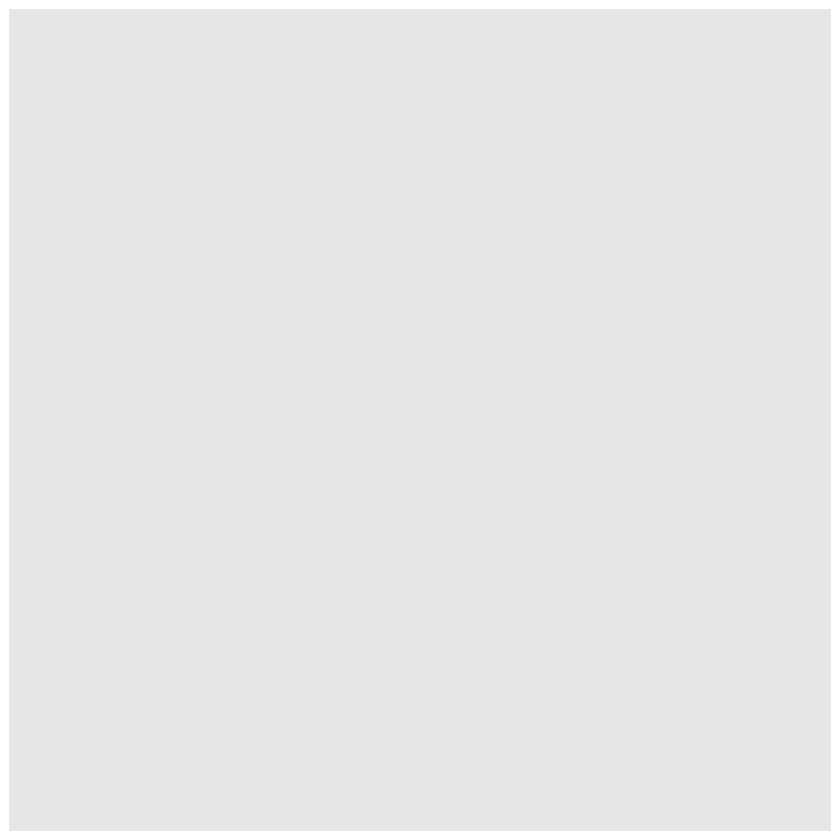

In [37]:
iris %>%
ggplot()

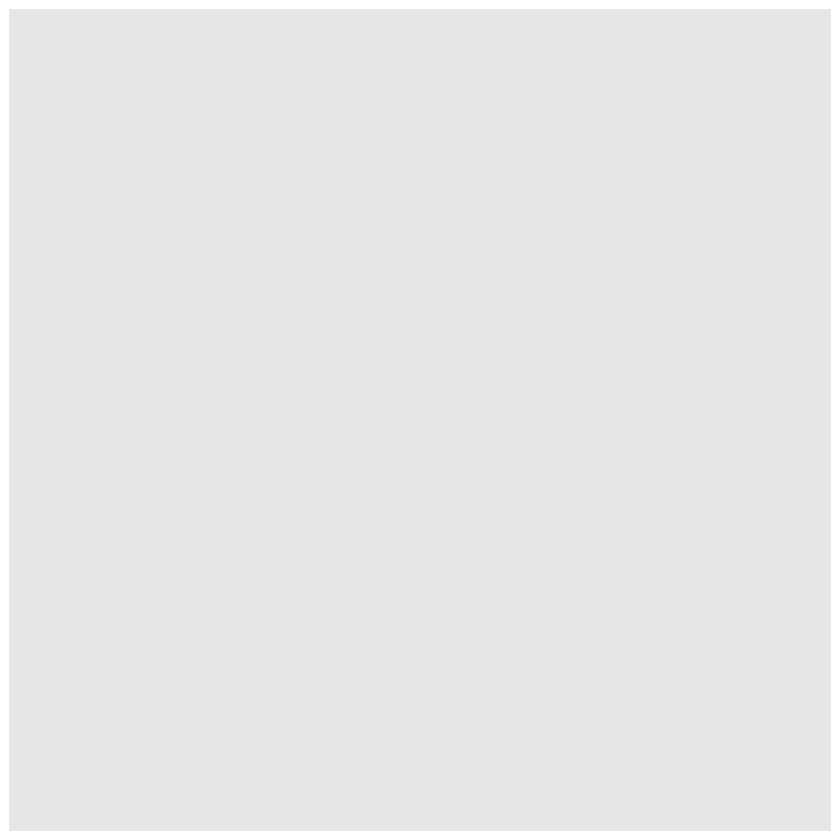

In [38]:
ggplot(data = iris)

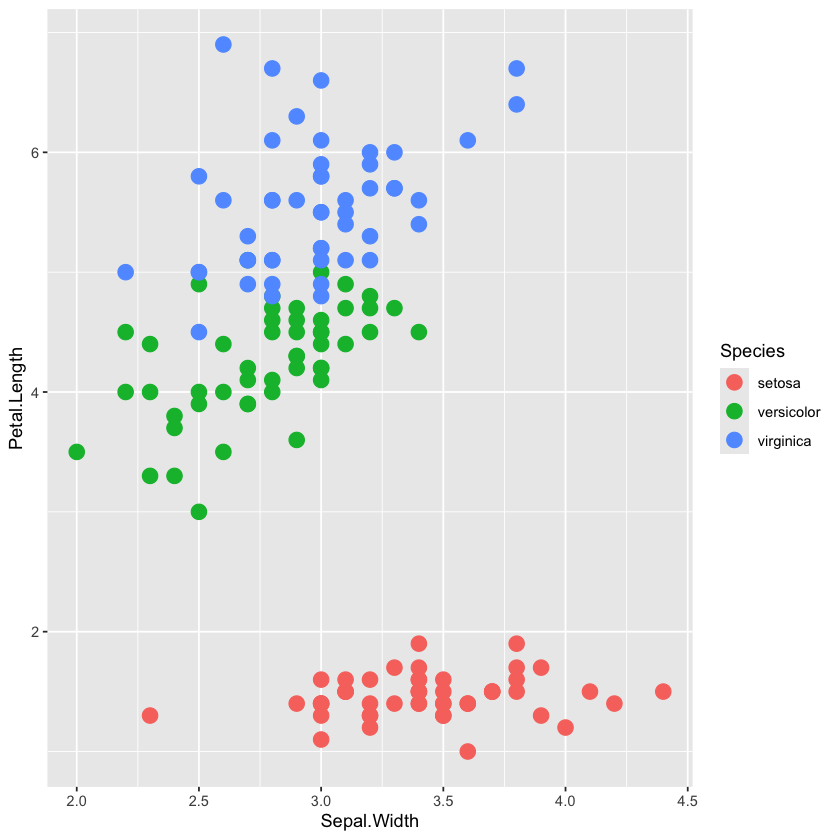

In [41]:
iris %>%
ggplot(aes(x= Sepal.Width, y = Petal.Length, color = Species))+
geom_point(size = 4)

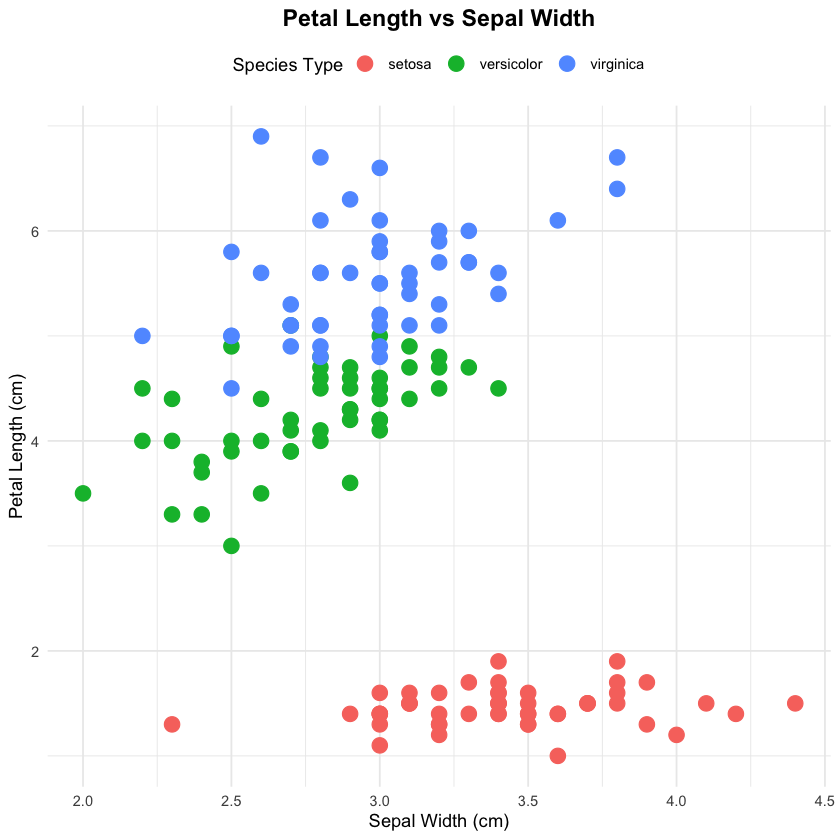

In [42]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length, color = Species)) +
  geom_point(size = 4) +
  labs(
    title = "Petal Length vs Sepal Width",
    x = "Sepal Width (cm)",
    y = "Petal Length (cm)",
    color = "Species Type"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    legend.position = "top"
  )

#### **Exercise**

Create a scatter plot of `Sepal.Length` vs `Setal.Width`, colored by `Species`. Follow the same block-based `ggplot2` structure we discussed.

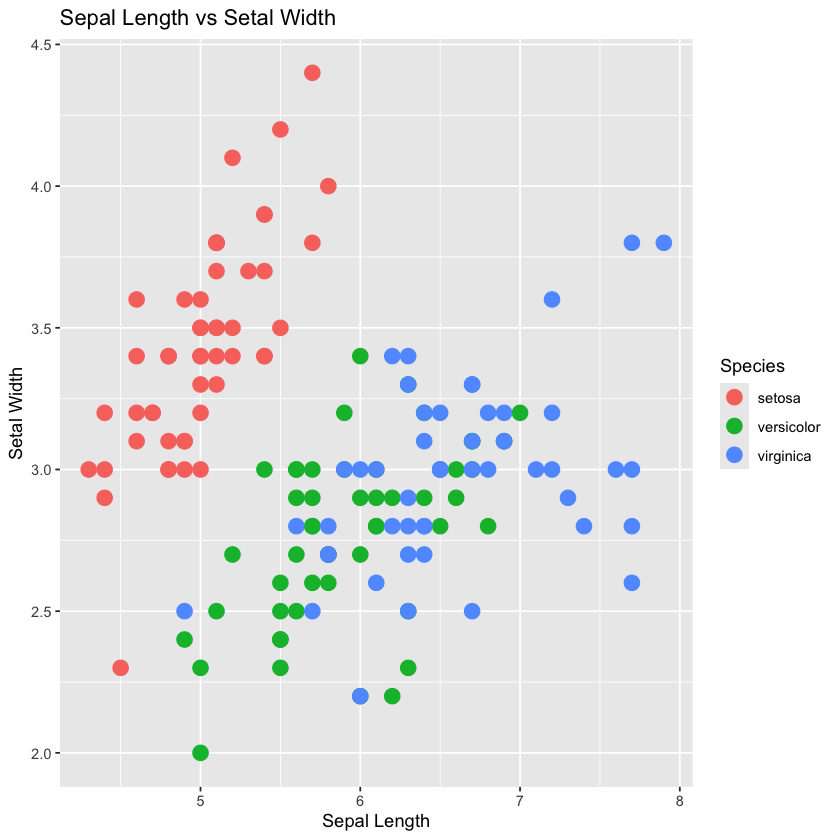

In [44]:
iris %>%
ggplot(aes(x=Sepal.Length,y=Sepal.Width,color = Species)) +
geom_point(size = 4) +
labs(title = "Sepal Length vs Setal Width",
x = "Sepal Length",
y = "Setal Width")

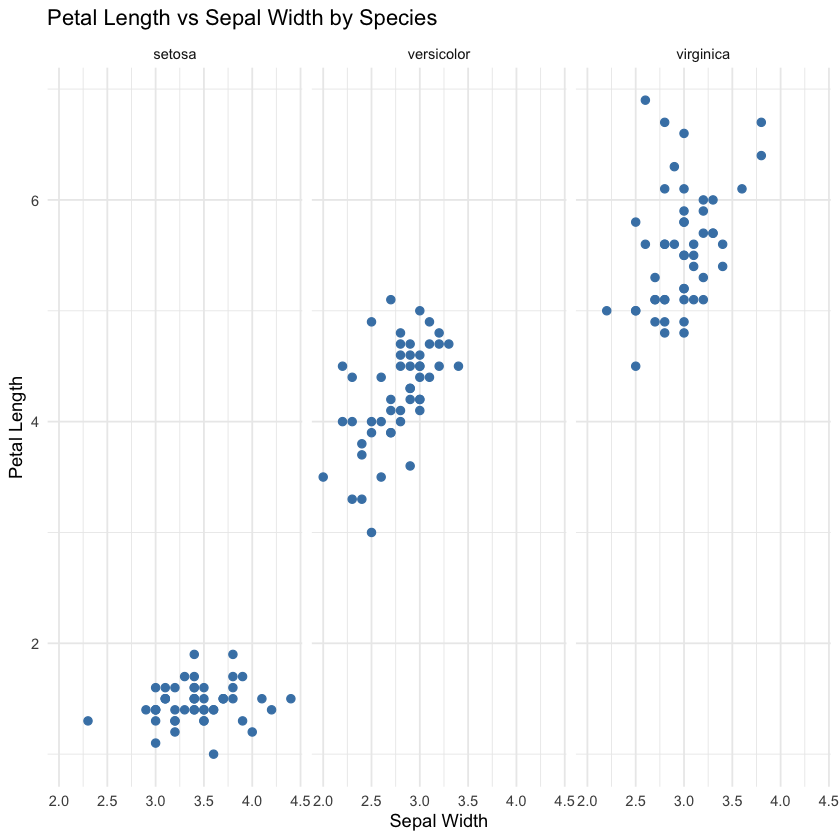

In [45]:
iris %>%
  ggplot(aes(x = Sepal.Width, y = Petal.Length)) +
  geom_point(color = "steelblue", size = 2) +
  facet_wrap(~ Species) +
  theme_minimal() +
  labs(
    title = "Petal Length vs Sepal Width by Species",
    x = "Sepal Width",
    y = "Petal Length"
  )

In [46]:
iris %>%
  select(Sepal.Length, Sepal.Width, Petal.Length, Species) %>%
  pivot_longer(
    cols = c(Sepal.Length, Petal.Length),
    names_to = "Measurement",
    values_to = "Length"
  ) -> long_iris

long_iris %>%
  head()

Sepal.Width,Species,Measurement,Length
<dbl>,<chr>,<chr>,<dbl>
3.5,setosa,Sepal.Length,5.1
3.5,setosa,Petal.Length,1.4
3.0,setosa,Sepal.Length,4.9
3.0,setosa,Petal.Length,1.4
3.2,setosa,Sepal.Length,4.7
3.2,setosa,Petal.Length,1.3


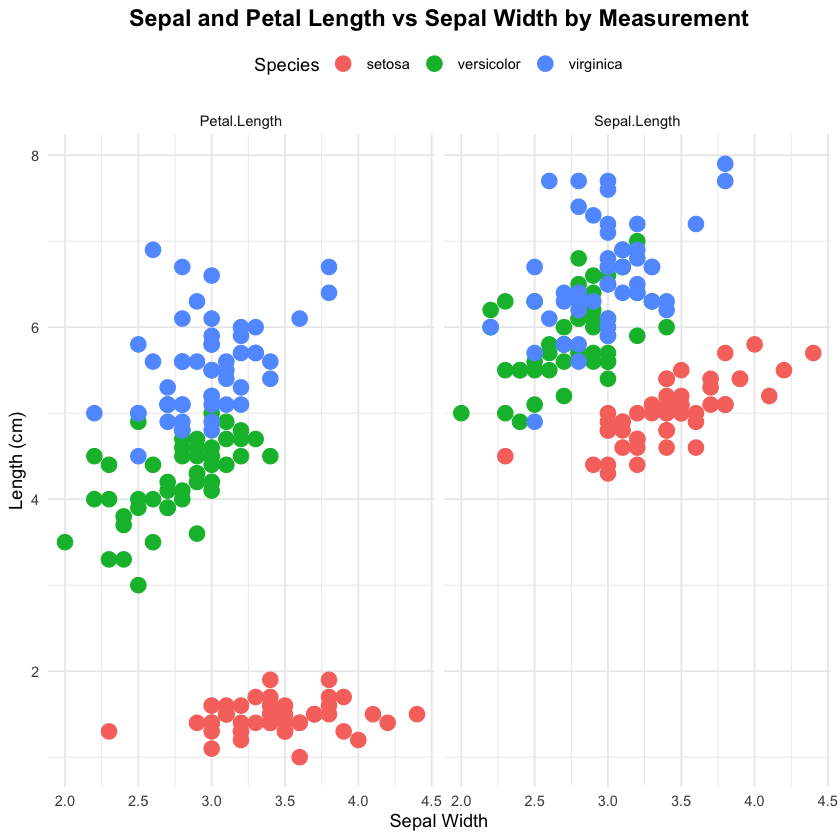

In [47]:
long_iris %>%
  ggplot(aes(x = Sepal.Width, y = Length, color = Species)) +
  geom_point(size = 4) +
  facet_wrap(~ Measurement) +
  labs(
    title = "Sepal and Petal Length vs Sepal Width by Measurement",
    x = "Sepal Width",
    y = "Length (cm)"
  ) +
  theme_minimal()+
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    legend.position = "top"
  )

## Workshop exercise

In [48]:
epa_data = read.csv('./datasets/epa_data.csv')
str(epa_data)

'data.frame':	13569 obs. of  9 variables:
 $ city : int  16 15 16 19 19 19 19 19 19 19 ...
 $ hwy  : int  24 22 22 27 29 24 26 27 29 24 ...
 $ cyl  : int  8 8 8 4 4 4 4 4 4 4 ...
 $ disp : num  5 5 5 2 2 2.4 2.4 2 2 2.4 ...
 $ drive: chr  "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" ...
 $ make : chr  "Jaguar" "Jaguar" "Jaguar" "Pontiac" ...
 $ model: chr  "XK" "XK" "XK Convertible" "Solstice" ...
 $ trans: chr  "Automatic" "Automatic" "Automatic" "Automatic" ...
 $ year : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


In [49]:
epa_data %>%
head(3)

,city,hwy,cyl,disp,drive,make,model,trans,year
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16,24,8,5,Rear-Wheel Drive,Jaguar,XK,Automatic,2010
2,15,22,8,5,Rear-Wheel Drive,Jaguar,XK,Automatic,2010
3,16,22,8,5,Rear-Wheel Drive,Jaguar,XK Convertible,Automatic,2010


### **Question 1**

Suppose you want to compare the fuel economy in city driving between manual and automatic transmissions using the EPA dataset.
- What type of graphical summary would best display this comparison?
- Use `ggplot` to produce this visualisation.

**Hint**:
- Only specify the x-axis inside `ggplot(aes())`.
- Use `geom_histogram(aes(y = after_stat(density)))` to plot normalised histograms for comparison (y-axis is defined here).
- Use `facet_wrap()` to create small multiples.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


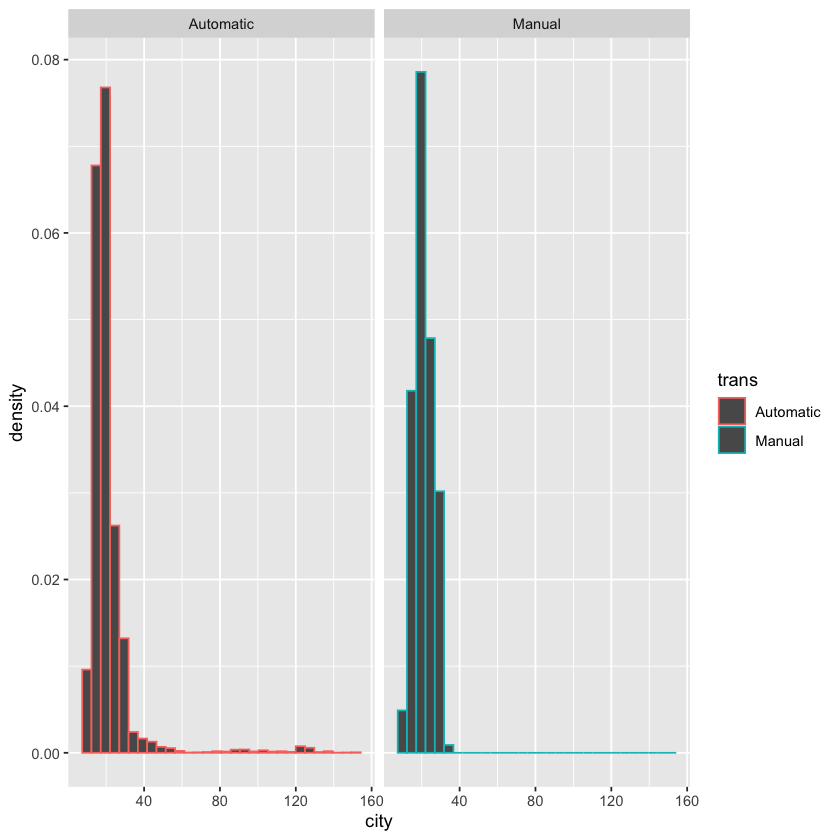

In [53]:
epa_data %>%
ggplot(aes(x = city,color = trans)) +
geom_histogram(aes(y = after_stat(density))) +
facet_wrap (~ trans)

### **Question 2**


Suppose you want to compare the combined fuel economy (city and highway driving) between manual and automatic transmissions using the EPA dataset.

- What steps would you take to prepare the data?
- What type of graphical summary would best display this comparison?
- Use `ggplot` to produce this visualisation.

**Hint**: We need a new `long-format` data frame.

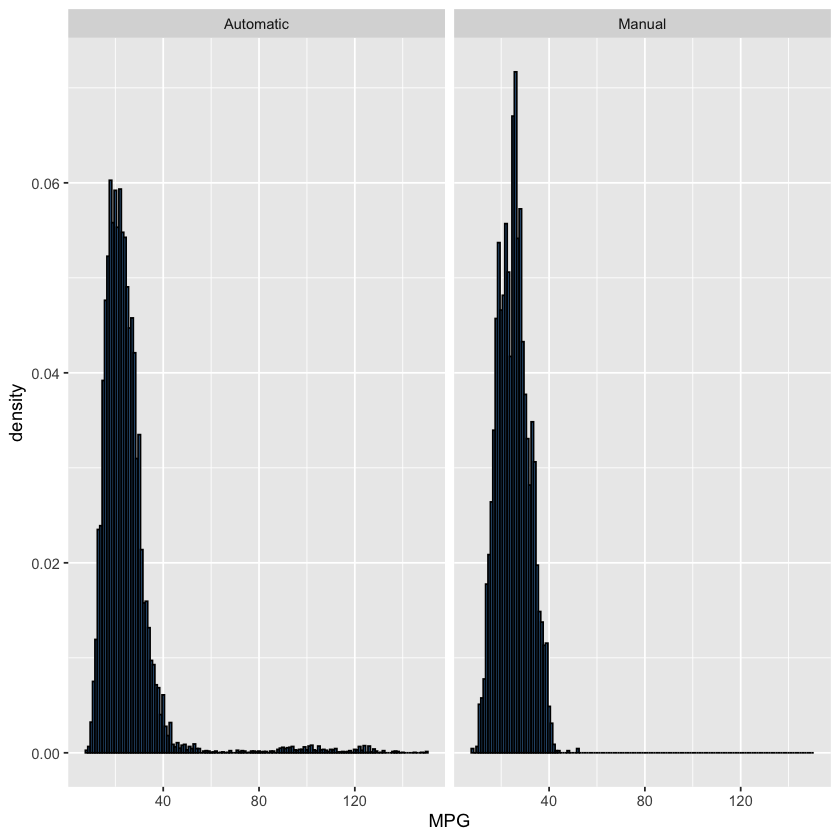

In [ ]:
epa_data %>%
pivot_longer(
    cols = c(city,hwy),
    names_to = "City and Highway",
    values_to = "MPG"
)%>%
ggplot(aes(x=MPG))+
geom_histogram(aes(y = after_stat(density)), binwidth = 1, fill = "steelblue", color = "black")+
facet_wrap(~ trans)

### **Question 3**

Suppose that you want to explore how engine displacement changed over time.

- What type of graph or chart would you use and why?
- Use `ggplot` to produce this graphical summary.

Warning message:
"Removed 215 rows containing non-finite outside the scale range
(`stat_summary()`)."


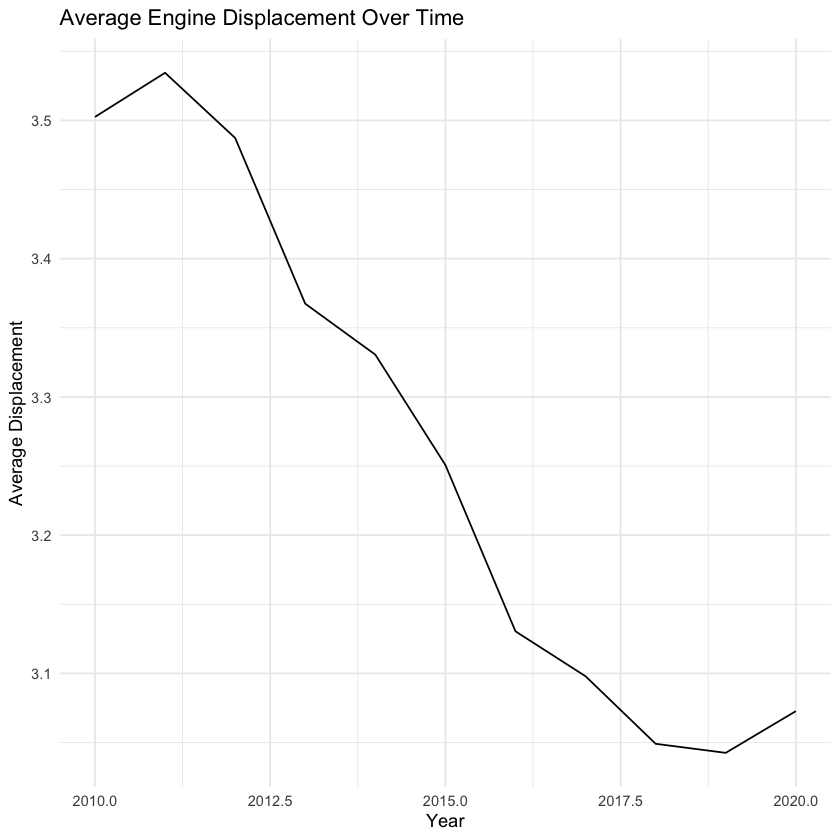

In [61]:
epa_data %>%
  ggplot(aes(x = year, y = disp)) +
  stat_summary(fun = mean, geom = "line") +
  labs(title = "Average Engine Displacement Over Time",
       x = "Year", y = "Average Displacement") +
  theme_minimal()

### **Question 4**

Suppose you want to identify which manufacturers produced the most fuel-efficient cars given city driving EPA in the `epa_data` dataset.

- Use `group_by() %>% summarise()` to summarise `EPA` by manufacturer. Name the summary column `mean_mpg`.

In [69]:
epa_data %>%
group_by(make) %>%
summarise(mean_mpg = mean(city),na.rm = TRUE)%>%
ggplot(aes(x=reorder(make,-mean_mpg), y = mean_mpg)) +
geom_bar(stat ="identity")+
labs(title = "Order of manufactures") +
theme_classic() -> my_plot

ggsave("mpg_plot.png", my_plot, width = 14, height = 8, dpi = 300)

### Question 5

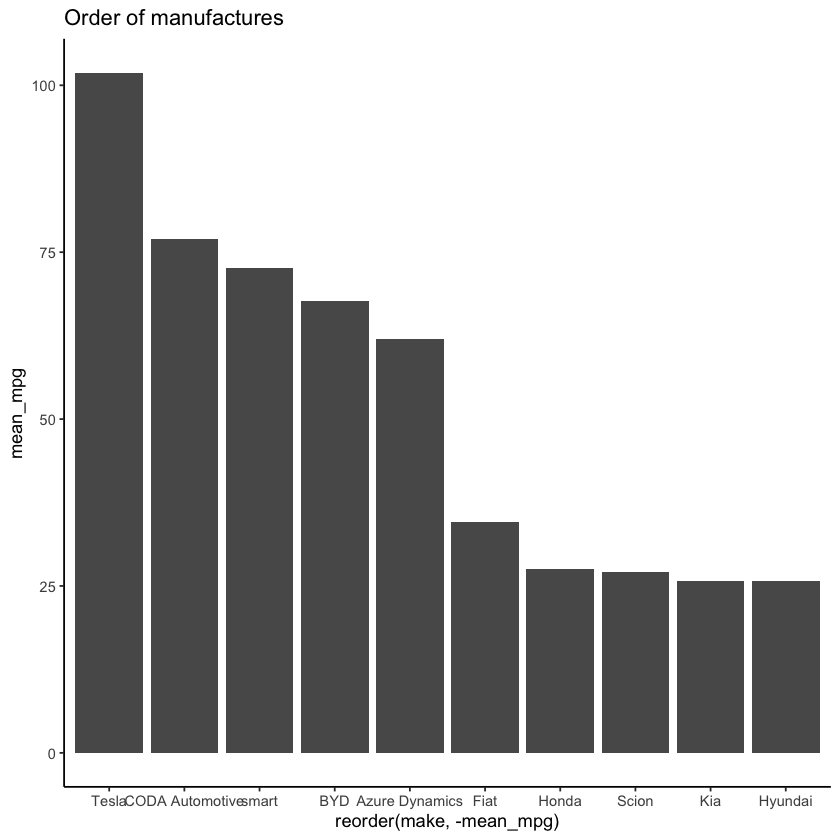

In [73]:
epa_data %>%
group_by(make) %>%
summarise(mean_mpg = mean(city),na.rm = TRUE)%>%
slice_max(order_by = mean_mpg, n =10) %>%
ggplot(aes(x=reorder(make,-mean_mpg), y = mean_mpg)) +
geom_bar(stat ="identity")+
labs(title = "Order of manufactures") +
theme_classic() 
# select only 10 values for displaying on the histogram